# Grabbing posters and genres from movies (TMDb API pull)

The code to grab things from the TMDb API is in `src/tmdb.py`. 

### Configuration: Getting API keys
1. Follow the steps in the [TMDb API docs](https://developers.themoviedb.org/3/getting-started) to get a key.
2. Once you have a key, your `keys.ini` file should be in `[CS109B project file path]/config/`. It needs to look like this:

```
[TMDb]
key:(your key)
key_v4:(your version 4 key - this isn't actually used, but just in case)
```

### Grabbing genres, posters from TMDb

In [1]:
%matplotlib inline

import os
import sys
import pandas as pd
from imdb import IMDb
from unidecode import unidecode
from IPython.display import Image, display

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# Importing the tmdb code from src/data
from data import tmdb

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%load_ext autoreload
%autoreload 2

### Master list of TMDb genres

In [3]:
genres = pd.DataFrame(tmdb.get_genres()['genres'])
print(genres.shape)
genres.head()

(19, 2)


,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


### A specific movie's info
[TMDb documentation for searching for movies.](https://developers.themoviedb.org/3/search/search-movies)

In [4]:
example = tmdb.find_movie_by_name('Moana')['results']
print(len(example))
example[0]

4


{u'adult': False,
 u'backdrop_path': u'/6v9KZ5DEwT1cgnpRDbHfS5edXpe.jpg',
 u'genre_ids': [12, 16, 35, 10751, 14],
 u'id': 277834,
 u'original_language': u'en',
 u'original_title': u'Moana',
 u'overview': u"In Ancient Polynesia, when a terrible curse incurred by Maui reaches an impetuous Chieftain's daughter's island, she answers the Ocean's call to seek out the demigod to set things right.",
 u'popularity': 4.510187,
 u'poster_path': u'/8m0lCMGVLuDod7lL20deiXInMq0.jpg',
 u'release_date': u'2016-11-23',
 u'title': u'Moana',
 u'video': False,
 u'vote_average': 7,
 u'vote_count': 1891}


**Moana**
In Ancient Polynesia, when a terrible curse incurred by Maui reaches an impetuous Chieftain's daughter's island, she answers the Ocean's call to seek out the demigod to set things right.
Genres: ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']


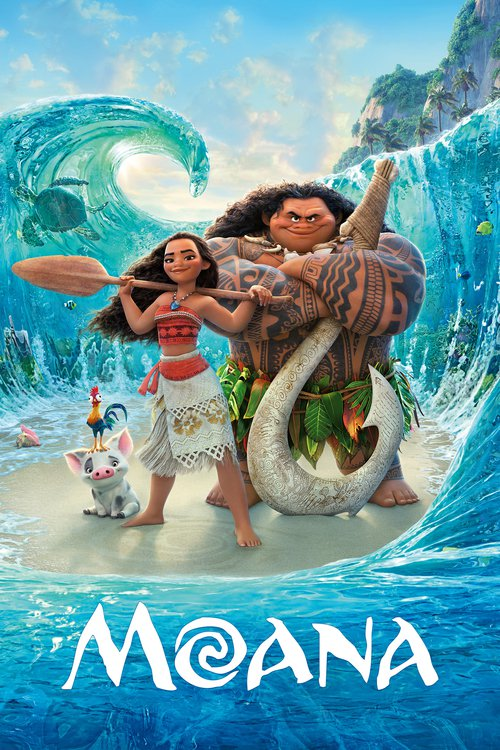


**Moana**
The life story of Italian iconic pornographic actress Moana Pozzi. The actress Ilona Staller sued the production of the film for the unauthorized use of the character "Cicciolina", of which she owned the rights.
Genres: ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']


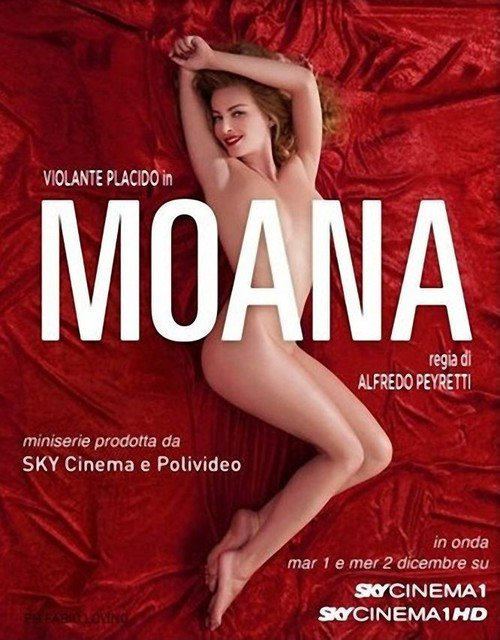


**Moana**
Robert J. Flaherty's South Seas follow-up to Nanook of the North is a Gauguin idyll moved by "pride of beauty... pride of strength."
Genres: ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']


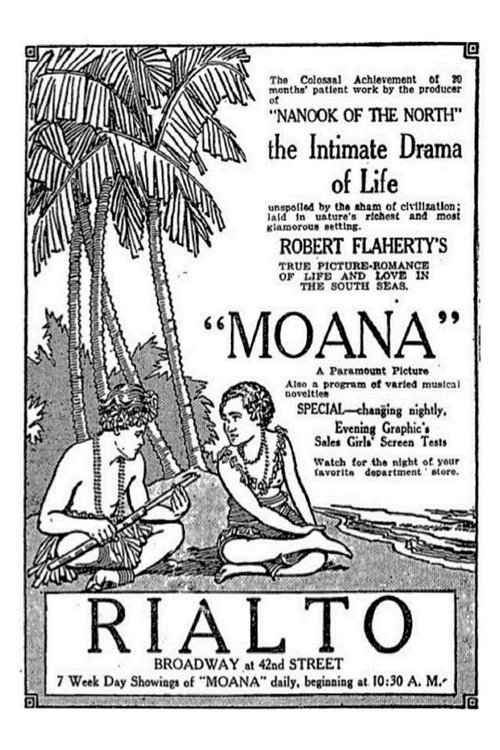


**Moana**
Documentary focused on underwater shootings and hawaiian dances.
Genres: ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']


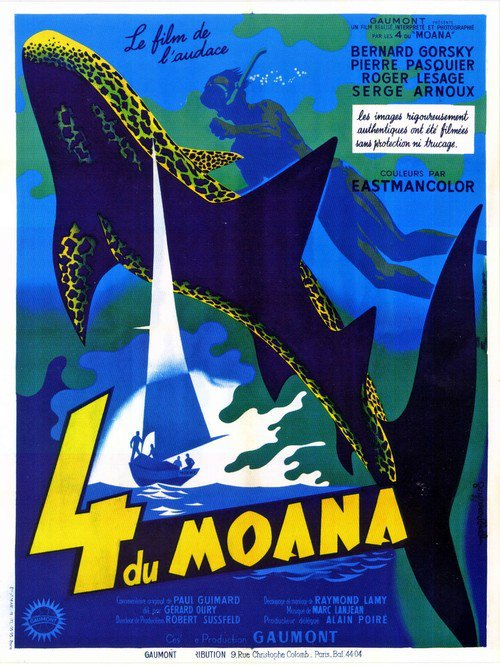

In [5]:
for i in range(0, len(example)):
    print('\n**{}**\n{}'.format(example[i]['title'], unidecode(example[i]['overview'])))
    genre_string_list = [unidecode(genres[genres['id'] == x]['name'].item()) if genres[genres['id'] == x].shape[0]>0 else 'none' for x in example[0]['genre_ids']]
    print('Genres: {}'.format(genre_string_list))
    if example[i]['poster_path'] is not None:
        poster = "{}{}".format("https://image.tmdb.org/t/p/w500/", example[i]['poster_path'])
        display(Image(poster))

### Most popular movies + their genres

TMDb returns stuff in JSON chunks. You can use `total_pages` and `total_results` to see the total number of data  points they can return. Here we just want the top 10 for year 2016.

In [6]:
# First two pages of results
page_1 = tmdb.get_popular()['results']
pages = page_1 + tmdb.get_popular(2)['results']

popular = pd.DataFrame(pages)
print(popular.shape)
recent_popular = popular[(popular['release_date'] >= '2016') & (popular['release_date'] < '2017')].copy()
print(recent_popular.shape)
recent_popular.head(5)

(40, 14)
(18, 14)


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
2,False,/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg,"[16, 35, 18, 10751, 10402]",335797,en,Sing,A koala named Buster recruits his best friend ...,89.556947,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,2016-11-23,Sing,False,6.7,981
5,False,/kMzU4PkXcKcDMngCxXji0BbVXsu.jpg,"[12, 28, 14]",259316,en,Fantastic Beasts and Where to Find Them,"In 1926, Newt Scamander arrives at the Magical...",45.369507,/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg,2016-11-16,Fantastic Beasts and Where to Find Them,False,7.0,3066
7,False,/iWRKYHTFlsrxQtfQqFOQyceL83P.jpg,"[12, 16, 35, 10751]",127380,en,Finding Dory,Dory is reunited with her friends Nemo and Mar...,39.086894,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,2016-06-16,Finding Dory,False,6.6,2872
10,False,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,"[28, 18, 878, 10752]",330459,en,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,32.888608,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,2016-12-14,Rogue One: A Star Wars Story,False,7.3,2889
11,False,/yIZ1xendyqKvY3FGeeUYUd5X9Mm.jpg,"[18, 878]",329865,en,Arrival,Taking place after alien crafts land around th...,32.520939,/hLudzvGfpi6JlwUnsNhXwKKg4j.jpg,2016-11-10,Arrival,False,6.9,3272


In [7]:
def get_tmdb_genres(row):
    return [unidecode(genres[genres['id'] == x]['name'].item()) if genres[genres['id'] == x].shape[0]>0 else 'none' for x in row['genre_ids']]

In [10]:
def get_imdb_genres(x):
    ia = IMDb()
    imdb_movie_object = ia.search_movie(x['original_title'])[0]
    ia.update(imdb_movie_object)
    return imdb_movie_object['genres']

In [11]:
recent_popular['tmdb_genres'] = recent_popular.apply(lambda x: get_tmdb_genres(x), axis = 1)
recent_popular['imdb_genres'] = recent_popular.apply(lambda x: get_imdb_genres(x), axis = 1)
recent_popular[['original_title', 'tmdb_genres', 'imdb_genres', 'popularity']].head(10)

,original_title,tmdb_genres,imdb_genres,popularity
2,Sing,"[Animation, Comedy, Drama, Family, Music]","[Animation, Comedy, Family, Music]",89.556947
5,Fantastic Beasts and Where to Find Them,"[Adventure, Action, Fantasy]","[Adventure, Family, Fantasy]",45.369507
7,Finding Dory,"[Adventure, Animation, Comedy, Family]","[Animation, Adventure, Comedy, Family]",39.086894
10,Rogue One: A Star Wars Story,"[Action, Drama, Science Fiction, War]","[Action, Adventure, Sci-Fi]",32.888608
11,Arrival,"[Drama, Science Fiction]","[Drama, Mystery, Sci-Fi, Thriller]",32.520939
12,Deadpool,"[Action, Adventure, Comedy, Romance]","[Action, Adventure, Comedy, Romance, Sci-Fi]",29.246519
16,Doctor Strange,"[Action, Adventure, Fantasy, Science Fiction]","[Action, Adventure, Fantasy, Sci-Fi]",27.891019
17,Underworld: Blood Wars,"[Action, Horror]","[Action, Horror]",27.860850
19,Captain America: Civil War,"[Action, Science Fiction]","[Action, Adventure, Sci-Fi]",26.804135
21,Zootopia,"[Animation, Adventure, Family, Comedy]","[Animation, Adventure, Comedy, Crime, Family, ...",19.164488
